# Assignment 4

For this assignment, I decided to work on air pollution on my city, focusing on an especially dangerous and pervasive type of pollution: particulate matter less than 10 micrometers in diameter, PM10 and PM2.5 (https://www.epa.gov/pm-pollution/particulate-matter-pm-basics#PM )

I wanted to check if levels of particulate matter near my home exceeded the limit recommended by the World Health Organization, and how the levels of pollution in my city compares with those in a similar area in New York city. 

## The Data

### Bogota

Data Source:
Red de Monitoreo de Calidad del Aire de Bogotá - RMCAB
(Bogota Air Quality Monitoring Network)
at http://201.245.192.252:81/

This data is an hourly report of the last six months of particulate matter monitored at the station closest to my home. The report was generated with these parameters:

Reporte por Estación (Report by Monitoring Station)
- Periódico 
- Estaciones (Station)
San Cristobal
- Fecha de Inicio (Start Date)
01-09-2016 (day first)
- Fecha Final	(End Date)
01-04-2017 (day first)
- Frecuencia de tiempo (Time frequency)
1 hora

### New York
Data Source:
New York State - Department of Environmental Conservation • Air Monitoring Website
at http://www.nyaqinow.net/

The report was generated with these parameters (report for PM2.5 only):

Station Report
- Periodic
- Stations
Queens College
- Start Date
1-9-2016 (month first)
- End Date
1-4-2017 (month first)
- Time Base
1 hour

Both reports were exported as Text

In [1]:
dpath = "G:/GitHub/InfoVizCourse/Assignment4_Data/"
import pandas as pd

#### Bogota

The data file is available at https://github.com/juandoso/InfoVizCourse/blob/master/data/StationData-Bogota_SanCristobal.txt

In [2]:
#The format of the data file is somewhat strange. I have to ignore the first column, the second line (which contains the units), and the last 8 lines (which contain a summary of the data)
dataB = pd.read_csv(dpath+"StationData-Bogota_SanCristobal.txt", sep='|', parse_dates=[1], dayfirst=True, skipinitialspace=True, decimal=',', usecols=[1,2,3], skiprows=[1,2], skipfooter=8, engine='python')

In [3]:
dataB.head()

,Fecha y Hora,PM2.5,PM10
0,01-09-2016 1:00,7.9,4.9
1,01-09-2016 2:00,7.3,8.0
2,01-09-2016 3:00,2.5,8.1
3,01-09-2016 4:00,6.5,7.3
4,01-09-2016 5:00,7.7,9.1


In [4]:
dataB.tail()

,Fecha y Hora,PM2.5,PM10
5106,01-04-2017 19:00,5.9,0.6
5107,01-04-2017 20:00,5.9,0.6
5108,01-04-2017 21:00,5.9,0.6
5109,01-04-2017 22:00,5.9,0.6
5110,01-04-2017 23:00,5.9,0.6


In [5]:
dataB.columns = ["FechaHora", "PM2.5", "PM10"]

In [6]:
#The spaces at the end of the dates cause problems at parsing
dataB["FechaHora"] = dataB["FechaHora"].apply(lambda l: l.strip())

In [8]:
#Correcting the hour format 1:00 (which gives many problems at parsing) to 01:00
import re
def dashrepl(matchobj):
    return " 0" + matchobj.group(0)[1:]

dataB["FechaHora"] = dataB["FechaHora"].apply(lambda l: re.sub(r' [1-9]:', dashrepl, l))

In [9]:
#Correcting the hour format 24:00 (which is not understood by the parser) to "23:59" (closest minute of the same day)
dataB["FechaHora"] = dataB["FechaHora"].apply(lambda l: l.replace("24:00", "23:59"))

In [10]:
dataB["FechaHora"] = pd.to_datetime(dataB["FechaHora"], format="%d-%m-%Y %H:%M")

In [11]:
#A date_index object that will be used for several tasks
date_index = pd.DatetimeIndex(dataB['FechaHora'])

In [12]:
#The main index will be the Monty-Day combination
dataB["Year"] = date_index.year
dataB["Month"] = date_index.month
dataB["Day"] = date_index.day

In [13]:
#The daily 24-hours mean
data_mean_2_B = dataB.groupby(["Year", "Month", "Day"])["PM2.5"].mean()
data_mean_10_B = dataB.groupby(["Year", "Month", "Day"])["PM10"].mean()

#### New York

The data file is available at https://github.com/juandoso/InfoVizCourse/blob/master/data/StationData-NY_QueensCollege.txt

In [14]:
#The format of the data file is similar to the one of Bogotá. The data management program is probably the same
dataNY = pd.read_csv(dpath+"StationData-NY_QueensCollege.txt", sep='|', parse_dates=[1], dayfirst=True, usecols=[1,2,3], skiprows=[1,2], skipfooter=8, engine='python')

In [15]:
dataNY.columns = ["FechaHora", "PM2.5"]

In [16]:
#Hours, months and days should be zero-padded

#Hours
def zerohour(matchobj):
    return " 0" + matchobj.group(0)[1:]
dataNY["FechaHora"] = dataNY["FechaHora"].apply(lambda l: re.sub(r' [1-9]:', zerohour, l))

#Months and days
def zeroday(matchobj):
    return "/0" + matchobj.group(0)[1:]
def zeromonth(matchobj):
    return " 0" + matchobj.group(0)[1:]

dataNY["FechaHora"] = dataNY["FechaHora"].apply(lambda l: re.sub(r'/[1-9]/', zeroday, l))
dataNY["FechaHora"] = dataNY["FechaHora"].apply(lambda l: re.sub(r' [1-9]/', zeromonth, l))

In [17]:
#The spaces at the end of the dates cause problems at parsing
dataNY["FechaHora"] = dataNY["FechaHora"].apply(lambda l: l.strip())

In [18]:
dataNY["FechaHora"] = pd.to_datetime(dataNY["FechaHora"], format="%m/%d/%Y %I:%M %p")

In [19]:
date_index = pd.DatetimeIndex(dataNY['FechaHora'])

In [20]:
dataNY["Year"] = date_index.year
dataNY["Month"] = date_index.month
dataNY["Day"] = date_index.day

In [21]:
#The spaces at the end of the PM2.5 values also cause problems at parsing
dataNY["PM2.5"] = dataNY["PM2.5"].apply(lambda l: l.strip())
dataNY["PM2.5"] = pd.to_numeric(dataNY["PM2.5"])

In [22]:
#The daily 24-hours mean
data_mean_2_NY = dataNY.groupby(["Year", "Month", "Day"])["PM2.5"].mean()

Visualization

In [23]:
#World Health Organization's Air Quality Guideline limits (24-hour mean)
#http://apps.who.int/iris/bitstream/10665/69477/1/WHO_SDE_PHE_OEH_06.02_eng.pdf
legal_pm2 = 25
legal_pm10 = 50

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18, 10)

In [25]:
import numpy as np
observation_axis = np.arange('2016-09-01', '2017-04-02', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

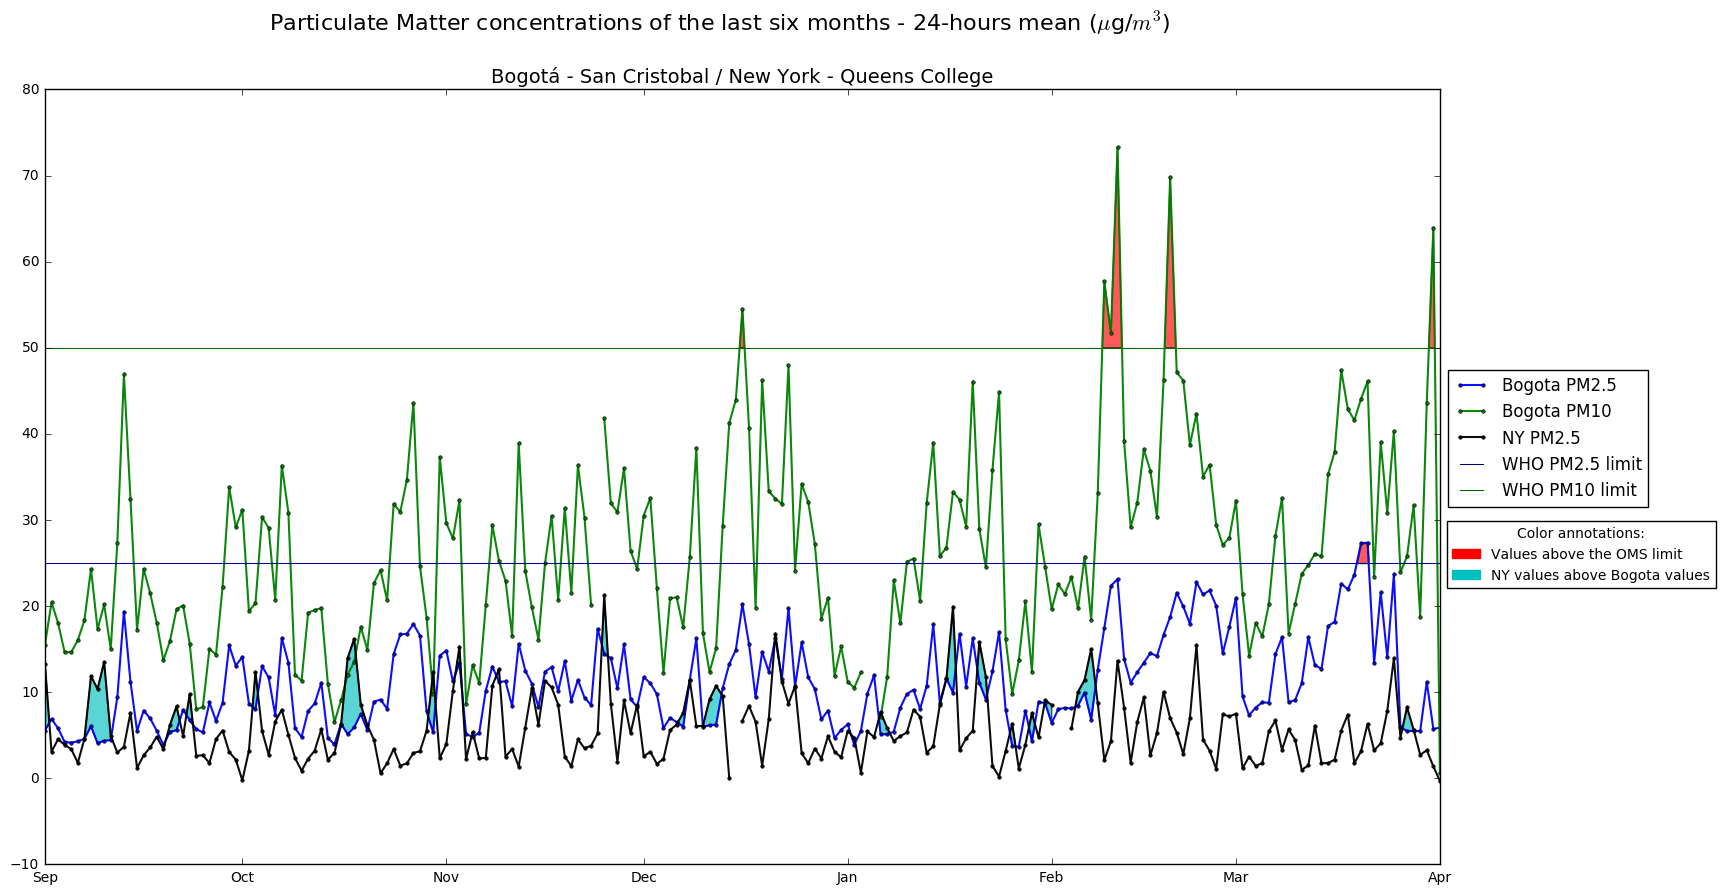

In [67]:
plt.suptitle("Particulate Matter concentrations of the last six months - 24-hours mean ($\mu$g/$m^3$)", fontsize=16)
plt.title("Bogotá - San Cristobal / New York - Queens College", fontsize=14)

#PM measures: 24-hours mean
#Bogota
plt.plot(observation_axis, data_mean_2_B.as_matrix(), '-o', observation_axis, data_mean_10_B.as_matrix(), '-o', ms=2.5, alpha=0.95, linewidth=1.5) 
#New York
plt.plot(observation_axis, data_mean_2_NY.as_matrix(), '-o', ms=2.5, alpha=0.95, color='black', linewidth=1.5) 

#OMS Guidelines
plt.axhline(y=legal_pm2, color='darkblue', linestyle='-', linewidth=0.75)
plt.axhline(y=legal_pm10, color='darkgreen', linestyle='-', linewidth=0.75)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

first_legend = plt.legend(['Bogota PM2.5', 'Bogota PM10', 'NY PM2.5', 'WHO PM2.5 limit', 'WHO PM10 limit'], 
                          loc='center left', bbox_to_anchor=(1.0, 0.55), prop={'size':12})
plt.gca().add_artist(first_legend)

import matplotlib.patches as mpatches
patches = [ mpatches.Patch(color='red', label='Values above the OMS limit'), 
           mpatches.Patch(color='c', label='NY values above Bogota values'),
          ]
plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1.0, 0.4), prop={'size':10}, title="Color annotations:")

#When Bogota measures exceed WHO limits?
plt.gca().fill_between(observation_axis, legal_pm2, data_mean_2_B, where=data_mean_2_B>=legal_pm2, 
                       interpolate=True, facecolor='red', alpha=0.65)
plt.gca().fill_between(observation_axis, legal_pm10, data_mean_10_B, where=data_mean_10_B>=legal_pm10, 
                       interpolate=True, facecolor='red', alpha=0.65)

#When NY measures exceed those of Bogota?
plt.gca().fill_between(observation_axis, data_mean_2_B, data_mean_2_NY, where=data_mean_2_NY>data_mean_2_B, 
                       interpolate=True, facecolor='c', alpha=0.65)
